In [1]:
# Problem Statement

#Build the random forest model after normalizing the variable to house pricing from boston data set.

In [2]:
#Following the code to get data into the environment:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

C:\Users\kashyap\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
targets

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

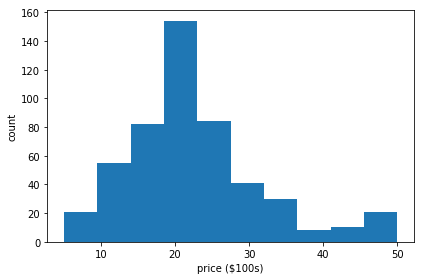

In [5]:
# Visualizing Target Variables:

%matplotlib inline
plt.figure(figsize=(6, 4))
plt.hist(targets)
plt.xlabel('price ($100s)')
plt.ylabel('count')
plt.tight_layout()
plt.show()

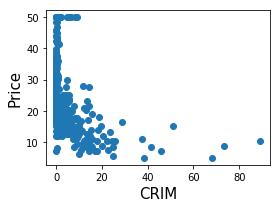

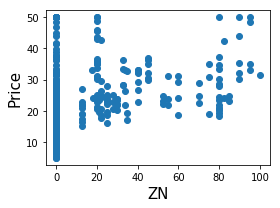

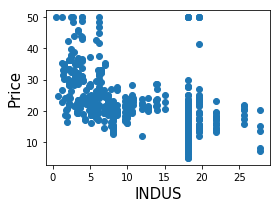

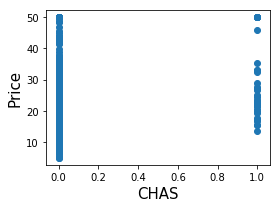

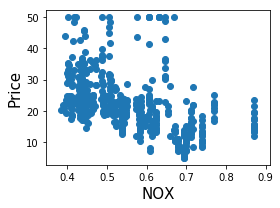

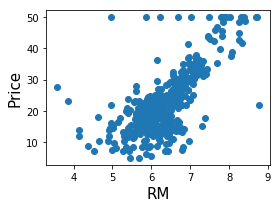

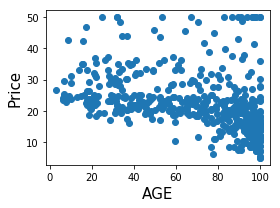

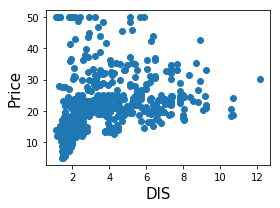

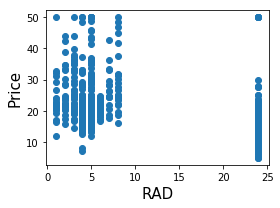

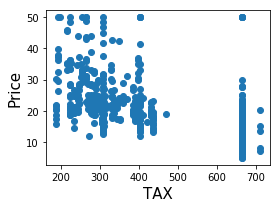

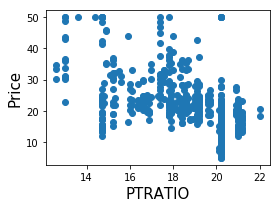

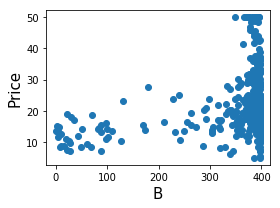

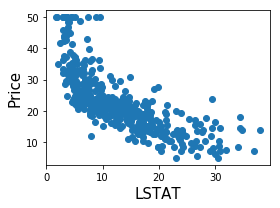

In [6]:
# Print the scatter plot for each feature with respect to price:

X = features.values
feature_names = features.columns
for index, feature_name in enumerate(features.columns):
    plt.figure(figsize=(4, 3))
    plt.scatter(X[:, index], targets)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

In [7]:
# Split the data into trainning set and test set:

X = features.values
Y = targets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=101)
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("Y_train shape : ", Y_train.shape)
print("Y_test shape : ", Y_test.shape)

X_train shape :  (354, 13)
X_test shape :  (152, 13)
Y_train shape :  (354,)
Y_test shape :  (152,)


In [8]:
# Importance score of features used in RandomForest Regressor:

rf = RandomForestRegressor(random_state=1)
rf.fit(X, Y)
print("Features sorted by their score")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), features.columns), reverse=True))
Y_pred = rf.predict(X_test)
print("Error Rate Of The Regression Model rf : ",mean_squared_error(Y_pred, Y_test))
print("R2 Score Of The Regression Model rf : ", r2_score(Y_pred, Y_test))

Features sorted by their score
[(0.4506, 'RM'), (0.37, 'LSTAT'), (0.065, 'DIS'), (0.0279, 'CRIM'), (0.0254, 'NOX'), (0.0195, 'PTRATIO'), (0.0155, 'TAX'), (0.0097, 'AGE'), (0.0084, 'B'), (0.004, 'INDUS'), (0.0027, 'RAD'), (0.001, 'ZN'), (0.0003, 'CHAS')]
Error Rate Of The Regression Model rf :  2.461969736842105
R2 Score Of The Regression Model rf :  0.971584550398111


In [9]:
lr = LinearRegression()
lr.fit(X, Y)
print("Features sorted their score:")

Y_pred_lr = lr.predict(X_test)
print("Error Rate of the Regression Model rf : ", mean_squared_error(Y_pred, Y_test))
print("R2 score of the Regression Model rf : ", r2_score(Y_pred_lr, Y_test))

Features sorted their score:
Error Rate of the Regression Model rf :  2.461969736842105
R2 score of the Regression Model rf :  0.6191902081027356


In [10]:
# Data Visualization:

Text(0.5,1,'Prices vs Predicted prices')

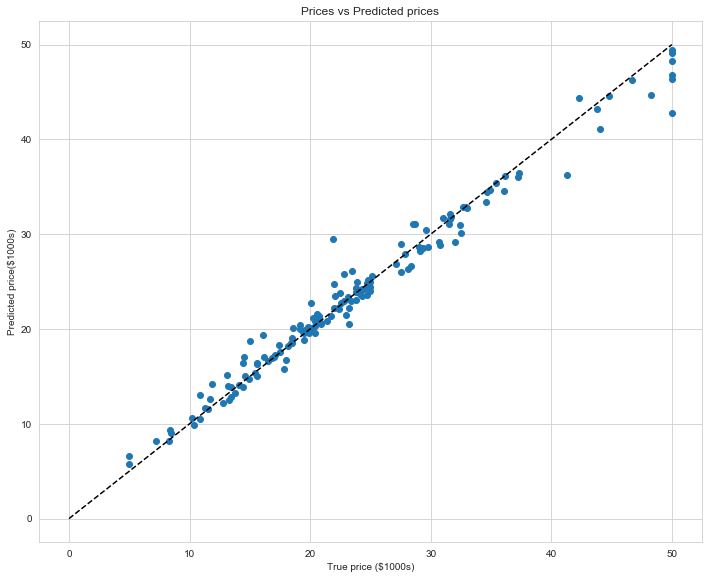

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, Y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price($1000s)')
plt.tight_layout()
plt.title("Prices vs Predicted prices")

In [12]:
# Data Visualization

Text(0.5,1,'Prices vs Predicted prices')

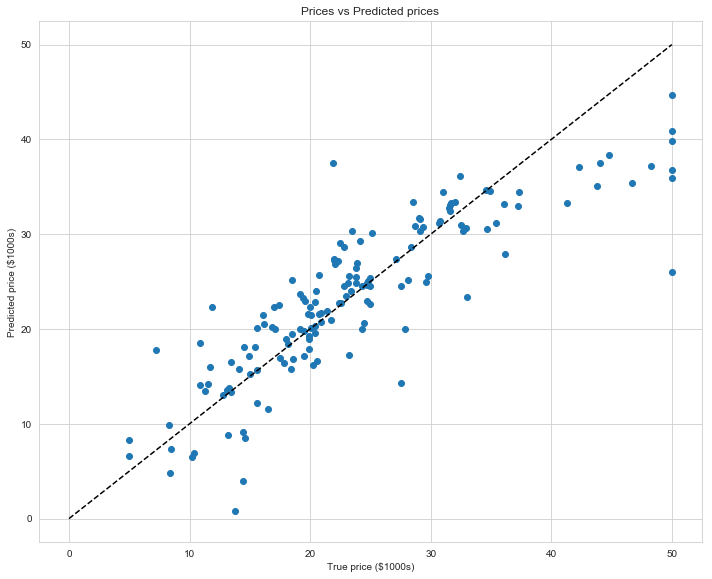

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, Y_pred_lr)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
plt.title("Prices vs Predicted prices")

In [14]:
# Using Bagging Mechanism to check the score of with different parameters.

In [15]:
# we can achieve the above two tasks using the following codes
# Bagging: using all features

In [16]:
rfc1 = RandomForestRegressor(max_features=13, random_state=1)
rfc1.fit(X_train, Y_train)
Y_pred1 = rfc1.predict(X_test)
print("Error Rate of the Regression Model rfc1 : ", mean_squared_error(Y_pred1, Y_test))
print("R2 Score of the Regression Model rfc1 : ", r2_score(Y_pred1, Y_test))
print('##########################################################################################')

# Play around with the setting for max_features:

rfc2 = RandomForestRegressor(max_features=8, random_state=1)
rfc2.fit(X_train, Y_train)
Y_pred2 = rfc2.predict(X_test)
print("Error Rate of the Regression Model rfc2 : ",mean_squared_error(Y_pred2,Y_test))
print("R2 Score of the Regression Model rfc2 : ",r2_score(Y_pred2,Y_test))
print('###########################################################################################')

# Play around with the setting for max_features:

rfc3 = RandomForestRegressor(n_estimators=20,max_features=8, random_state=1)
rfc3.fit(X_train, Y_train)
Y_pred3 = rfc2.predict(X_test)
print("Error Rate of the Regression Model rfc3 : ", mean_squared_error(Y_pred3, Y_test))
print("R2 Score of the Regression Model rfc3 : ", r2_score(Y_pred3, Y_test))

Error Rate of the Regression Model rfc1 :  12.970775
R2 Score of the Regression Model rfc1 :  0.8270714144863721
##########################################################################################
Error Rate of the Regression Model rfc2 :  15.970603289473681
R2 Score of the Regression Model rfc2 :  0.7816165647549633
###########################################################################################
Error Rate of the Regression Model rfc3 :  15.970603289473681
R2 Score of the Regression Model rfc3 :  0.7816165647549633


In [17]:
print(sorted(zip(map(lambda x: round(x, 4), rfc1.feature_importances_), features.columns), reverse=True))

[(0.5, 'LSTAT'), (0.3102, 'RM'), (0.0555, 'CRIM'), (0.0404, 'DIS'), (0.0265, 'NOX'), (0.0188, 'PTRATIO'), (0.0161, 'TAX'), (0.0148, 'AGE'), (0.0065, 'INDUS'), (0.0061, 'B'), (0.0029, 'RAD'), (0.002, 'ZN'), (0.0003, 'CHAS')]


In [18]:
print(sorted(zip(map(lambda x: round(x, 4), rfc2.feature_importances_), features.columns), reverse=True))

[(0.4344, 'LSTAT'), (0.3187, 'RM'), (0.0626, 'NOX'), (0.0576, 'CRIM'), (0.0325, 'PTRATIO'), (0.0254, 'DIS'), (0.0163, 'TAX'), (0.0141, 'AGE'), (0.013, 'RAD'), (0.0095, 'INDUS'), (0.0092, 'B'), (0.004, 'CHAS'), (0.0028, 'ZN')]


In [19]:
print(sorted(zip(map(lambda x: round(x, 4), rfc3.feature_importances_), features.columns), reverse=True))

[(0.3621, 'LSTAT'), (0.3502, 'RM'), (0.0807, 'CRIM'), (0.0719, 'NOX'), (0.0361, 'DIS'), (0.027, 'PTRATIO'), (0.0188, 'AGE'), (0.0146, 'INDUS'), (0.0134, 'TAX'), (0.013, 'B'), (0.0081, 'RAD'), (0.0023, 'CHAS'), (0.0019, 'ZN')]


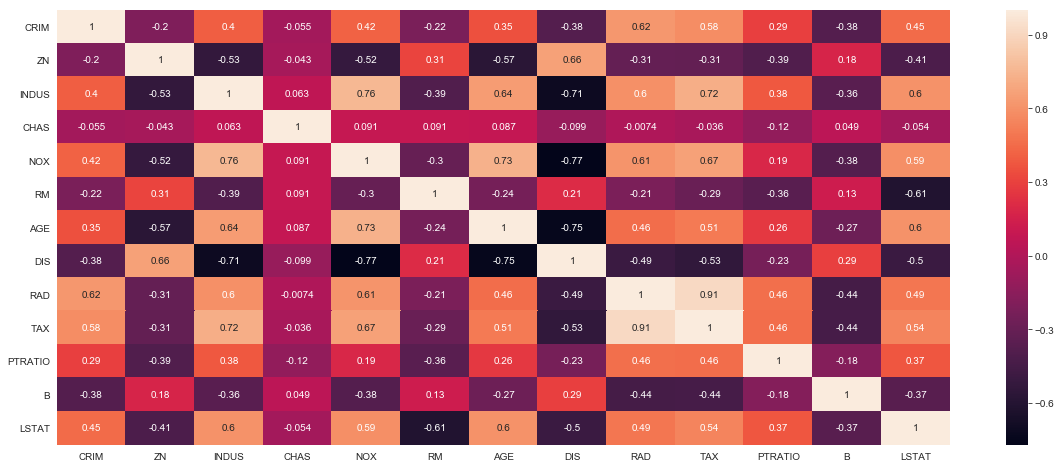

In [20]:
df_corr = features.corr()
sns.set_style('whitegrid')
plt.figure(figsize=(20, 8))
sns.heatmap(df_corr, annot=True)

In [21]:
#Create correlation matrix with absolute values:

df_corr = features.corr().abs()

# Select upper triangle of matrix

up_tri = df_corr.where(np.triu(np.ones(df_corr.shape[1]), k=1).astype(np.bool))


#Find all the features which have a correlation > 0.75 with other features.

corr_features = [ column for column in up_tri.columns if any(up_tri[column]> 0.75)]

# Print Correlated features:

print(corr_features)

['NOX', 'DIS', 'TAX']


In [22]:
up_tri

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,NaN,0.199458,0.404471,0.055295,0.417521,0.219940,0.350784,0.377904,0.622029,0.579564,0.288250,0.377365,0.452220
ZN,NaN,NaN,0.533828,0.042697,0.516604,0.311991,0.569537,0.664408,0.311948,0.314563,0.391679,0.175520,0.412995
INDUS,NaN,NaN,NaN,0.062938,0.763651,0.391676,0.644779,0.708027,0.595129,0.720760,0.383248,0.356977,0.603800
CHAS,NaN,NaN,NaN,NaN,0.091203,0.091251,0.086518,0.099176,0.007368,0.035587,0.121515,0.048788,0.053929
NOX,NaN,NaN,NaN,NaN,NaN,0.302188,0.731470,0.769230,0.611441,0.668023,0.188933,0.380051,0.590879
RM,NaN,NaN,NaN,NaN,NaN,NaN,0.240265,0.205246,0.209847,0.292048,0.355501,0.128069,0.613808
AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.747881,0.456022,0.506456,0.261515,0.273534,0.602339
DIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.494588,0.534432,0.232471,0.291512,0.496996
RAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.910228,0.464741,0.444413,0.488676
TAX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.460853,0.441808,0.543993


In [23]:
# Eliminating the correlated varaiables and trying the RandomForestRegressor again:

In [24]:
# Eliminating two and keeping one features:

X1 = features.drop(['DIS', 'TAX'], axis=1)
Y1 = targets
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y1,test_size =0.3,random_state=101)
print("X_train Shape : ",X_train.shape)
print("X_test Shape : ",X_test.shape)
print("Y_train Shape : ",Y_train.shape)
print("Y_test.shape : ",Y_test.shape)
rf4 = RandomForestRegressor()
rf4.fit(X_test, Y_test)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf4.feature_importances_), X1.columns),reverse=True))

X_train Shape :  (354, 11)
X_test Shape :  (152, 11)
Y_train Shape :  (354,)
Y_test.shape :  (152,)
Features sorted by their score:
[(0.6894, 'RM'), (0.1905, 'LSTAT'), (0.0367, 'CRIM'), (0.0194, 'NOX'), (0.019, 'AGE'), (0.0145, 'B'), (0.0093, 'PTRATIO'), (0.0092, 'RAD'), (0.0056, 'CHAS'), (0.0053, 'INDUS'), (0.0009, 'ZN')]


In [25]:
Y_pred4 = rf4.predict(X_test)
print("Error Rate of Regression Model rfc3 : ", mean_squared_error(Y_pred4, Y_test))
print("R2 Score of the Regression Model rfc3 : ", r2_score(Y_pred4, Y_test))

Error Rate of Regression Model rfc3 :  8.977455263157893
R2 Score of the Regression Model rfc3 :  0.9006275078505074


Text(0.5,1,'Price vs Predicted prices ')

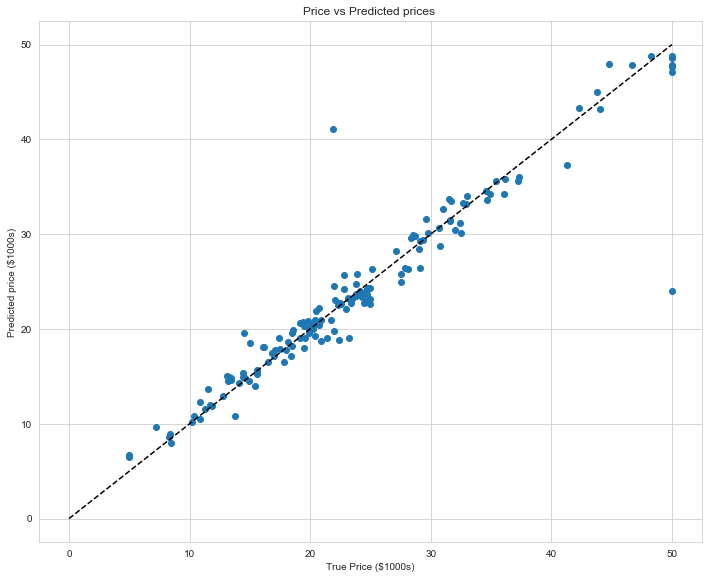

In [26]:
# Regression Plot for RandomForestRegression Model rf4:

sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, Y_pred4)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True Price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
plt.title("Price vs Predicted prices ")

In [27]:
# Regression Plot for RandomForestRegression Model rfc3:

Text(0.5,1,'Prices vs Predicted prices')

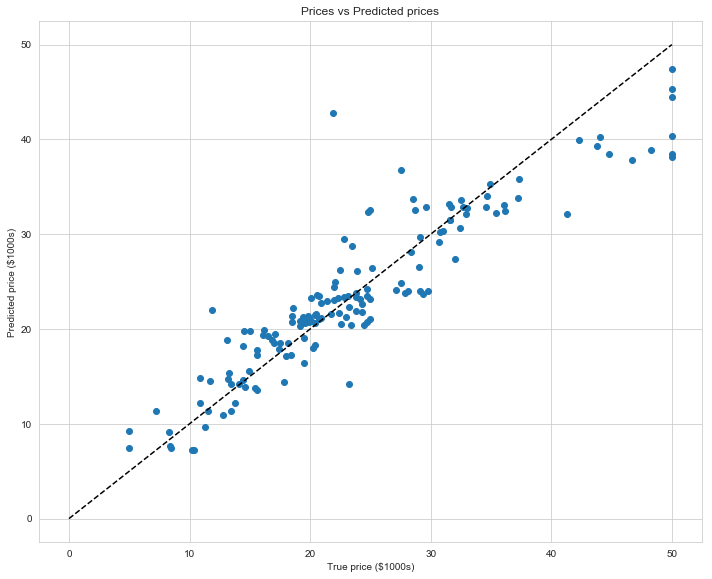

In [28]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, Y_pred3)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
plt.title("Prices vs Predicted prices")

In [29]:
# Regression Plot for RandomForestRegression Model rfc2:

Text(0.5,1,'Prices vs Predicted prices')

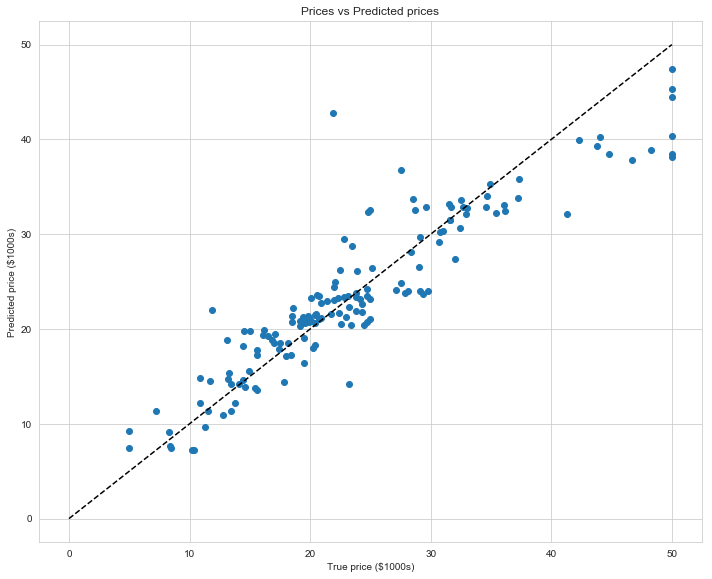

In [30]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, Y_pred2)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
plt.title("Prices vs Predicted prices")

In [31]:
# Regression Plot for RandomForestRegression Model rfc1:

Text(0.5,1,'Prices vs Predicted prices')

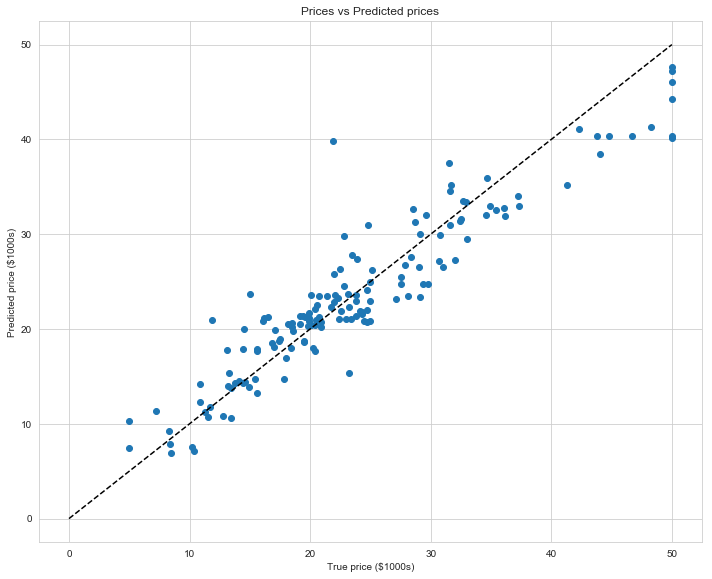

In [32]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, Y_pred1)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
plt.title("Prices vs Predicted prices")

In [33]:
# Regression Plot for RandomForestRegression Model rf:

Text(0.5,1,'Prices vs Predicted prices')

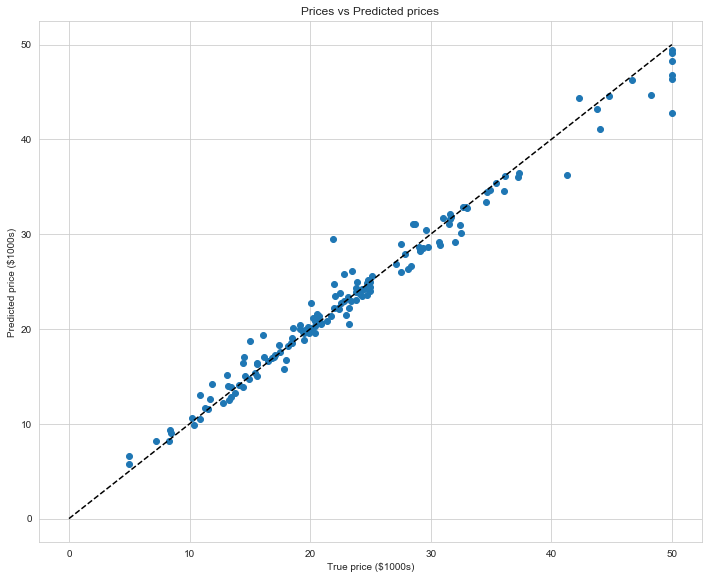

In [34]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, Y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
plt.title("Prices vs Predicted prices")

In [35]:
# 10 Fold Cross Validation with max_features at 10:

In [39]:
from sklearn.cross_validation import KFold
from collections import defaultdict
kfold = KFold(len(X),n_folds=10,shuffle=True,random_state=0)
lr = RandomForestRegressor(max_features=10,random_state=1)
X = features.values
Y = targets
names = features.columns
fold_accuracy = []
scores_kfold =  defaultdict(list)
for train_fold, valid_fold in kfold:
    train = X[train_fold] # Extract train data with cv indices
    valid = X[valid_fold] # Extract valid data with cv indices
    
    train_y = Y[train_fold]
    valid_y = Y[valid_fold]
    
    model = lr.fit(train,train_y)
    pred = rf.predict(valid)
    valid_acc = model.score(X = valid, y = valid_y)
    fold_accuracy.append(valid_acc) 
    acc = r2_score(valid_y, pred)
    for i in range(X.shape[1]):
        X_t = valid.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(valid_y, rf.predict(X_t))
        scores_kfold[names[i]].append((acc-shuff_acc)/acc)
    

print("Accuracy per fold: ", fold_accuracy, "\n")
print("Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))

print("Features sorted by their score:")
print(sorted([(round(np.mean(score), 4), feat) for
              feat, score in scores_kfold.items()], reverse=True))

Accuracy per fold:  [0.6839464469450487, 0.8220338548953083, 0.8911904456418323, 0.9300743979847733, 0.7033552469326099, 0.9077794279452027, 0.6672827046888656, 0.8329642778144942, 0.9352902632053334, 0.8409967083843857] 

Average accuracy:  0.8214913774437853
Features sorted by their score:
[(0.5739, 'LSTAT'), (0.524, 'RM'), (0.0986, 'DIS'), (0.0594, 'NOX'), (0.0404, 'CRIM'), (0.0268, 'PTRATIO'), (0.0153, 'AGE'), (0.0139, 'TAX'), (0.0085, 'B'), (0.0065, 'INDUS'), (0.0038, 'RAD'), (0.0008, 'ZN'), (0.0004, 'CHAS')]


In [40]:
# 10 FOLD CROSS VALDATON with max_features as 8:

In [41]:
from sklearn.cross_validation import KFold
from collections import defaultdict
kfold = KFold(len(X),n_folds=8,shuffle=True,random_state=0)
lr = RandomForestRegressor(max_features=10,random_state=1)
X = features.values
Y = targets
names = features.columns
fold_accuracy = []
scores_kfold =  defaultdict(list)
for train_fold, valid_fold in kfold:
    train = X[train_fold] # Extract train data with cv indices
    valid = X[valid_fold] # Extract valid data with cv indices
    
    train_y = Y[train_fold]
    valid_y = Y[valid_fold]
    
    model = lr.fit(train,train_y)
    pred = rf.predict(valid)
    valid_acc = model.score(X = valid, y = valid_y)
    fold_accuracy.append(valid_acc) 
    acc = r2_score(valid_y, pred)
    for i in range(X.shape[1]):
        X_t = valid.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(valid_y, rf.predict(X_t))
        scores_kfold[names[i]].append((acc-shuff_acc)/acc)
    

print("Accuracy per fold: ", fold_accuracy, "\n")
print("Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))

print("Features sorted by their score:")
print(sorted([(round(np.mean(score), 4), feat) for
              feat, score in scores_kfold.items()], reverse=True))

Accuracy per fold:  [0.6848621532689587, 0.8244330239598076, 0.8911900965195921, 0.8425233967592982, 0.914025151285431, 0.6170295653762968, 0.9197875874689413, 0.8840942998242023] 

Average accuracy:  0.822243159307816
Features sorted by their score:
[(0.7301, 'LSTAT'), (0.5427, 'RM'), (0.0958, 'DIS'), (0.0655, 'NOX'), (0.0376, 'CRIM'), (0.0268, 'PTRATIO'), (0.0197, 'TAX'), (0.0152, 'AGE'), (0.0072, 'B'), (0.0066, 'INDUS'), (0.0033, 'RAD'), (0.0006, 'ZN'), (0.0006, 'CHAS')]
